In [33]:
# Use Conv2D and Max pooling on Mnist Fashion dataset to predict the class

In [34]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt


In [35]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from keras.datasets import fashion_mnist


In [36]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [37]:
# analysisng the data

In [38]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [39]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

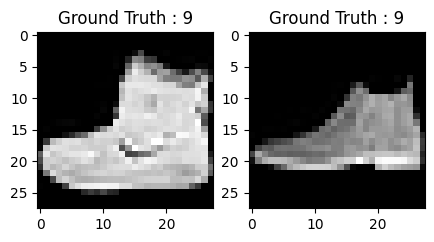

In [40]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [41]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape



((60000, 28, 28, 1), (10000, 28, 28, 1))

In [42]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [43]:
# using one hot encoding on y train labels

In [44]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [45]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [32]:
batch_size = 64
epochs = 5
num_classes = 10


In [46]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Conv2D(64, (3, 3), activation='relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2)))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='relu'))
fashion_model.add(Dropout(0.5))
fashion_model.add(Dense(num_classes, activation='softmax'))


In [47]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [48]:
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [31]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 49s 65ms/step - loss: 0.1569 - accuracy: 0.9389 - val_loss: 0.2814 - val_accuracy: 0.9114
Epoch 2/20
750/750 [==============================] - 52s 69ms/step - loss: 0.1503 - accuracy: 0.9418 - val_loss: 0.2886 - val_accuracy: 0.9124
Epoch 3/20
750/750 [==============================] - 50s 66ms/step - loss: 0.1467 - accuracy: 0.9429 - val_loss: 0.2888 - val_accuracy: 0.9152
Epoch 4/20
750/750 [==============================] - 49s 66ms/step - loss: 0.1413 - accuracy: 0.9444 - val_loss: 0.2970 - val_accuracy: 0.9158
Epoch 5/20
750/750 [==============================] - 47s 63ms/step - loss: 0.1380 - accuracy: 0.9468 - val_loss: 0.2875 - val_accuracy: 0.9168
Epoch 6/20
750/750 [==============================] - 51s 68ms/step - loss: 0.1343 - accuracy: 0.9479 - val_loss: 0.3094 - val_accuracy: 0.9123
Epoch 7/20
750/750 [==============================] - 51s 68ms/step - loss: 0.1313 - accuracy: 0.9486 - val_loss: 0.2948 - val_accuracy:

In [49]:
predictions=fashion_model.predict(test_X)

313/313 [==============================] - 3s 10ms/step


In [50]:
# evaluate the model

In [51]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)


In [52]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 2.3254783153533936
Test accuracy: 0.03370000049471855


In [53]:
('Test loss:', 0.46366268818555401)
('Test accuracy:', 0.91839999999999999)


('Test accuracy:', 0.9184)